In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Read input data file

In [60]:
dt = pd.read_csv('E:\SoHoa\DoAn\Adidas US Datasets.csv')

Look through the data file just read with the first 5 lines

In [61]:
dt.head()

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,New York-New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,New York-New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,New York-New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,New York-New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,New York-New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


We can also check the size of the data file with the following command

In [62]:
dt.shape 

(9648, 11)

As a result, we can see that the data file has 9648 rows and 11 columns.

Next we can check the detailed statistics of each column as follows

In [63]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Location Key      9648 non-null   object
 4   Product           9648 non-null   object
 5   Price per Unit    9648 non-null   object
 6   Units Sold        9648 non-null   object
 7   Total Sales       9648 non-null   object
 8   Operating Profit  9648 non-null   object
 9   Operating Margin  9648 non-null   object
 10  Sales Method      9648 non-null   object
dtypes: int64(1), object(10)
memory usage: 829.2+ KB


We can also check for duplicate values ​​in our data file with the DataFrame.duplicated() statement.

In [64]:
dup = dt[dt.duplicated()]
dup

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


according to the results returned to us. DataFrame does not have any duplicate values

Next, we check to see if there are any columns or rows in the DataFrame with missing values ​​with the DataFrame.isna().sum() statement.

In [65]:
is_na = dt.isna().sum()
is_na

Retailer            0
Retailer ID         0
Invoice Date        0
Location Key        0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

To make sure it does not affect the original data file, we copy this file and save it in another variable
We can use df.copy() function

In [66]:
df = dt.copy(deep=True)

Next we will read the file containing the location of each retailer into a DataFrame. And we will proceed with the same steps above to test our DataFrame

In [67]:
df_loc = pd.read_csv('E:\SoHoa\DoAn\Location Adidas US Datasets.csv')

Look through the data file you just read with the first 5 lines and assign it to the variable named top5

In [68]:
top5 = df_loc.head()
top5

,Region,State,City,LocationKey
0,Northeast,New York,New York,New York-New York
1,South,Texas,Houston,Texas-Houston
2,West,California,San Francisco,California-San Francisco
3,West,California,Los Angeles,California-Los Angeles
4,Midwest,Illinois,Chicago,Illinois-Chicago


check the size of the DataFrame

In [69]:
number_rows = df_loc.shape[0]
number_columns = df_loc.shape[1]

In [70]:
number_rows

54

In [71]:
number_columns

4

See detailed statistics of DataFrame

In [72]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Region       54 non-null     object
 1   State        54 non-null     object
 2   City         54 non-null     object
 3   LocationKey  54 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


check for duplicate and missing values ​​in DataFrame

In [73]:
dup = df_loc.duplicated().sum()
dup

0

In [74]:
miss = df_loc.isna().sum()
miss

Region         0
State          0
City           0
LocationKey    0
dtype: int64

After carefully reviewing and checking the DataFrames, we will proceed to connect the 2 DataFrames together. Because the 2 DataFrames have a relationship with each other, we will need to connect them to have a complete DataFrame.

To join two tables, we need the column names to be the same, so we will change the column name of one of the two DataFrames.

In [75]:
df_loc.rename(columns={'LocationKey': 'Location Key'}, inplace = True)

Review whether the column name has been changed as we want or not

In [76]:
df_loc.columns

Index(['Region', 'State', 'City', 'Location Key'], dtype='object')

We proceed to join 2 DataFrames with the command DataFrame.merge()

In [77]:
dfn = df.merge(df_loc, how='inner', on='Location Key')

Let's check again

In [78]:
dfn.head()

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
0,Foot Locker,1185732,1/1/2020,New York-New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store,Northeast,New York,New York
1,Foot Locker,1185732,1/2/2020,New York-New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store,Northeast,New York,New York
2,Foot Locker,1185732,1/3/2020,New York-New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store,Northeast,New York,New York
3,Foot Locker,1185732,1/4/2020,New York-New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store,Northeast,New York,New York
4,Foot Locker,1185732,1/5/2020,New York-New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store,Northeast,New York,New York


In [79]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Location Key      9648 non-null   object
 4   Product           9648 non-null   object
 5   Price per Unit    9648 non-null   object
 6   Units Sold        9648 non-null   object
 7   Total Sales       9648 non-null   object
 8   Operating Profit  9648 non-null   object
 9   Operating Margin  9648 non-null   object
 10  Sales Method      9648 non-null   object
 11  Region            9648 non-null   object
 12  State             9648 non-null   object
 13  City              9648 non-null   object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


Next, we will proceed to process some data columns. We see that only the 'Retailer Id' column is of type int64, the remaining columns are objects (strings).
But to be able to calculate and visualize data we need to convert the data types of the columns
(Price per Unit, Units Sold, Total Sales, Operating Profit) to int64 type

First, with the 'Price per unit' column, we will proceed to delete characters such as commas (,), currency symbols ($), spaces (' ')

In [80]:
dfn['Price per Unit'].unique()

array(['$50.00 ', '$40.00 ', '$45.00 ', '$60.00 ', '$55.00 ', '$65.00 ',
       '$70.00 ', '$25.00 ', '$35.00 ', '$47.00 ', '$36.00 ', '$41.00 ',
       '$46.00 ', '$44.00 ', '$58.00 ', '$48.00 ', '$39.00 ', '$43.00 ',
       '$59.00 ', '$56.00 ', '$49.00 ', '$54.00 ', '$64.00 ', '$53.00 ',
       '$61.00 ', '$62.00 ', '$68.00 ', '$52.00 ', '$66.00 ', '$51.00 ',
       '$24.00 ', '$34.00 ', '$33.00 ', '$32.00 ', '$38.00 ', '$27.00 ',
       '$31.00 ', '$28.00 ', '$37.00 ', '$42.00 ', '$20.00 ', '$26.00 ',
       '$30.00 ', '$23.00 ', '$29.00 ', '$80.00 ', '$75.00 ', '$72.00 ',
       '$63.00 ', '$69.00 ', '$76.00 ', '$67.00 ', '$57.00 ', '$18.00 ',
       '$19.00 ', '$21.00 ', '$13.00 ', '$22.00 ', '$71.00 ', '$78.00 ',
       '$73.00 ', '$74.00 ', '$85.00 ', '$83.00 ', '$100.00 ', '$90.00 ',
       '$95.00 ', '$82.00 ', '$98.00 ', '$77.00 ', '$88.00 ', '$86.00 ',
       '$15.00 ', '$14.00 ', '$17.00 ', '$12.00 ', '$10.00 ', '$9.00 ',
       '$16.00 ', '$11.00 ', '$7.00 ', '$97.00 ', '

In [81]:
dfn['Price per Unit'] = dfn['Price per Unit'].apply(lambda x: x.replace(',', ''))
dfn['Price per Unit'] = dfn['Price per Unit'].apply(lambda x: x.replace('$', ''))
dfn['Price per Unit'] = dfn['Price per Unit'].apply(lambda x: x.replace(' ', ''))
dfn['Price per Unit'] = dfn['Price per Unit'].apply(lambda x: x.replace('.00', ''))

Check whether the results are as we expected or not

In [82]:
dfn['Price per Unit'].head()

0    50
1    50
2    40
3    45
4    60
Name: Price per Unit, dtype: object

Next will be to convert the data type for the Price per Unit column from object to int or float

In [83]:
dfn['Price per Unit'] = dfn['Price per Unit'].astype(int)
print(dfn['Price per Unit'].dtype)

int32


We do the same for the other columns

In [84]:
dfn['Total Sales'] = dfn['Total Sales'].apply(lambda x: x.replace('$', ''))
dfn['Total Sales'] = dfn['Total Sales'].apply(lambda x: x.replace(',', ''))

In [85]:
dfn['Total Sales'] = dfn['Total Sales'].astype(int)
print(dfn['Total Sales'].dtypes)

int32


In [86]:
dfn['Operating Profit'] = dfn['Operating Profit'].apply(lambda x: x.replace('$', ''))
dfn['Operating Profit'] = dfn['Operating Profit'].apply(lambda x: x.replace(',', ''))
dfn['Operating Profit'] = dfn['Operating Profit'].astype(int)
dfn['Operating Profit']

0       300000
1       150000
2       140000
3       133875
4       162000
         ...  
9643       896
9644      1378
9645      2791
9646      1235
9647       650
Name: Operating Profit, Length: 9648, dtype: int32

In [87]:
dfn['Units Sold'] = dfn['Units Sold'].apply(lambda x: x.replace(',', ''))
dfn['Units Sold'] = dfn['Units Sold'].astype(int)
dfn['Units Sold']

0       1200
1       1000
2       1000
3        850
4        900
        ... 
9643      64
9644     105
9645     184
9646      70
9647      83
Name: Units Sold, Length: 9648, dtype: int32

Check the detailed statistics for the newly changed DataFrame

In [88]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Location Key      9648 non-null   object
 4   Product           9648 non-null   object
 5   Price per Unit    9648 non-null   int32 
 6   Units Sold        9648 non-null   int32 
 7   Total Sales       9648 non-null   int32 
 8   Operating Profit  9648 non-null   int32 
 9   Operating Margin  9648 non-null   object
 10  Sales Method      9648 non-null   object
 11  Region            9648 non-null   object
 12  State             9648 non-null   object
 13  City              9648 non-null   object
dtypes: int32(4), int64(1), object(9)
memory usage: 979.9+ KB


We also need to convert the data type for the 'Invoice Date' column from Object to Datetime to make it easier to handle date data types.

In [89]:
dfn['Invoice Date'] = pd.to_datetime(dfn['Invoice Date'])
print(dfn['Invoice Date'].dtypes)

datetime64[ns]


After processing the data types and converting them, next we will proceed to visualize the data to have a better overview and understanding.

In [90]:
retailer = dfn['Retailer'].unique()
sale_by_retailer = {}
for item in retailer:
    rows = dfn[dfn['Retailer'] == item]
    total_sale = rows['Total Sales'].sum()
    sale_by_retailer[item] = total_sale
sale_by_retailer

{'Foot Locker': 220094720,
 'Walmart': 74558410,
 'Sports Direct': 182470997,
 'West Gear': 242964333,
 "Kohl's": 102114753,
 'Amazon': 77698912}

In [91]:
sale_by_retailer = dict(sorted(sale_by_retailer.items(), key=lambda item: item[1]))
sale_by_retailer

{'Walmart': 74558410,
 'Amazon': 77698912,
 "Kohl's": 102114753,
 'Sports Direct': 182470997,
 'Foot Locker': 220094720,
 'West Gear': 242964333}

In [92]:
name_retailer = []
value_retailer = []
for item in sale_by_retailer:
    name = item 
    value = sale_by_retailer[item]
    name_retailer.append(name)
    value_retailer.append(value)

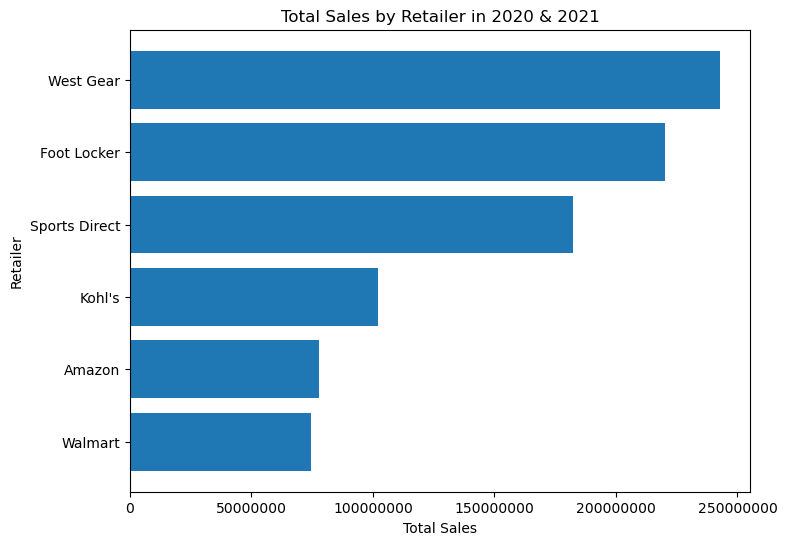

In [93]:
plt.figure(figsize=(8,6))
plt.barh(name_retailer, value_retailer)
plt.ticklabel_format(axis='x', style='plain')
plt.title('Total Sales by Retailer in 2020 & 2021')
plt.xlabel('Total Sales')
plt.ylabel('Retailer')
plt.show()

Because we have 2 years, 2020 and 2021, we will now separate two years to compare.

In [94]:
dfn_2020 = dfn[dfn['Invoice Date'].between('1/1/2020', '12/31/2020')]
dfn_2020.head()

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
0,Foot Locker,1185732,2020-01-01,New York-New York,Men's Street Footwear,50,1200,600000,300000,50%,In-store,Northeast,New York,New York
1,Foot Locker,1185732,2020-01-02,New York-New York,Men's Athletic Footwear,50,1000,500000,150000,30%,In-store,Northeast,New York,New York
2,Foot Locker,1185732,2020-01-03,New York-New York,Women's Street Footwear,40,1000,400000,140000,35%,In-store,Northeast,New York,New York
3,Foot Locker,1185732,2020-01-04,New York-New York,Women's Athletic Footwear,45,850,382500,133875,35%,In-store,Northeast,New York,New York
4,Foot Locker,1185732,2020-01-05,New York-New York,Men's Apparel,60,900,540000,162000,30%,In-store,Northeast,New York,New York


In [95]:
dfn_2020['Invoice Date'].dt.year

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
2227    2020
2228    2020
2229    2020
2230    2020
2231    2020
Name: Invoice Date, Length: 1302, dtype: int64

In [96]:
dfn_2021 = dfn[dfn['Invoice Date'].between('1/1/2021', '12/31/2021')]
dfn_2021.head()

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
453,West Gear,1128299,2021-01-01,California-San Francisco,Men's Athletic Footwear,65,750,487500,121875,25%,Outlet,West,California,San Francisco
454,West Gear,1128299,2021-01-02,California-San Francisco,Women's Street Footwear,65,750,487500,195000,40%,Outlet,West,California,San Francisco
455,West Gear,1128299,2021-01-03,California-San Francisco,Women's Athletic Footwear,60,650,390000,136500,35%,Outlet,West,California,San Francisco
456,West Gear,1128299,2021-01-04,California-San Francisco,Men's Apparel,65,550,357500,196625,55%,Outlet,West,California,San Francisco
457,West Gear,1128299,2021-01-05,California-San Francisco,Women's Apparel,80,725,580000,116000,20%,Outlet,West,California,San Francisco


In [97]:
dfn_2021['Invoice Date'].dt.year

453     2021
454     2021
455     2021
456     2021
457     2021
        ... 
9643    2021
9644    2021
9645    2021
9646    2021
9647    2021
Name: Invoice Date, Length: 8346, dtype: int64

In [98]:
percentage_2020 = dfn_2020.groupby('Region').sum()
percentage_2020['percentages Sales']  = (percentage_2020['Total Sales'] / sum(dfn_2020['Total Sales'])) * 100
percentage_2020['percentages Sales'] = percentage_2020['percentages Sales'].apply(lambda x: float('%.2f' %x))
percentage_2020 = percentage_2020.reset_index()
percentage_2020

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\3373092752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  percentage_2020 = dfn_2020.groupby('Region').sum()


,Region,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,percentages Sales
0,Midwest,170778216,5957,20838,7378068,2670235,4.05
1,Northeast,273360084,11012,115011,40749709,14222804,22.38
2,South,257897112,8265,90322,25456882,9845140,13.98
3,Southeast,170745408,7317,73135,31600863,12168628,17.36
4,West,640204997,33369,163043,76895153,24468903,42.23


In [99]:
percentage_2021 = dfn_2021.groupby('Region').sum()
percentage_2021['percentages Sales']  = (percentage_2021['Total Sales'] / sum(dfn_2021['Total Sales'])) * 100
percentage_2021['percentages Sales'] = percentage_2021['percentages Sales'].apply(lambda x: float('%.2f' %x))
percentage_2021 = percentage_2021.reset_index()
percentage_2021

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\2395058785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  percentage_2021 = dfn_2021.groupby('Region').sum()


,Region,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,percentages Sales
0,Midwest,2051317482,69601,370499,128422391,50141177,17.89
1,Northeast,2542935676,99927,386268,145574358,53797884,20.28
2,South,1795256649,57808,401938,119206299,51292904,16.61
3,Southeast,1248026049,54107,333865,131570373,48386834,18.33
4,West,2174780460,88887,523942,193048029,65140613,26.89


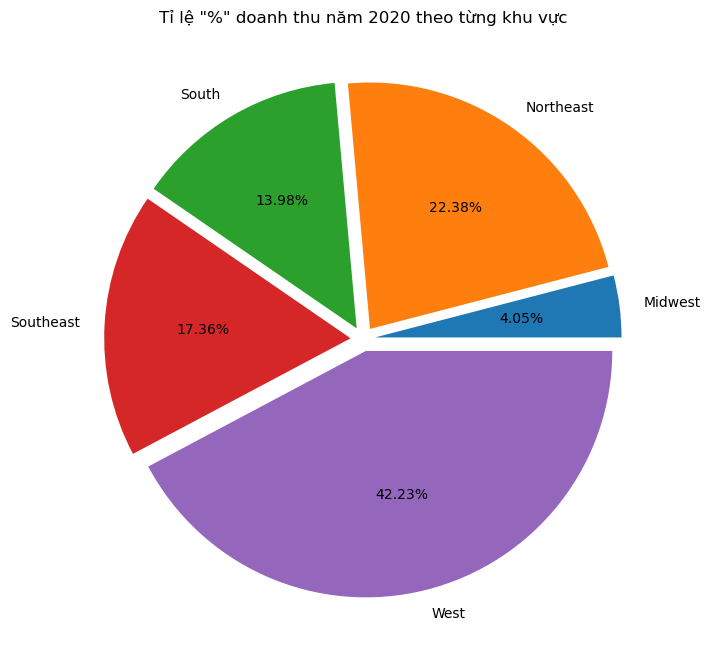

In [100]:
plt.figure(figsize=(8,8))
plt.pie(percentage_2020['percentages Sales'], labels=percentage_2020['Region'], autopct='%1.2f%%', explode=[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Tỉ lệ "%" doanh thu năm 2020 theo từng khu vực')
plt.show()

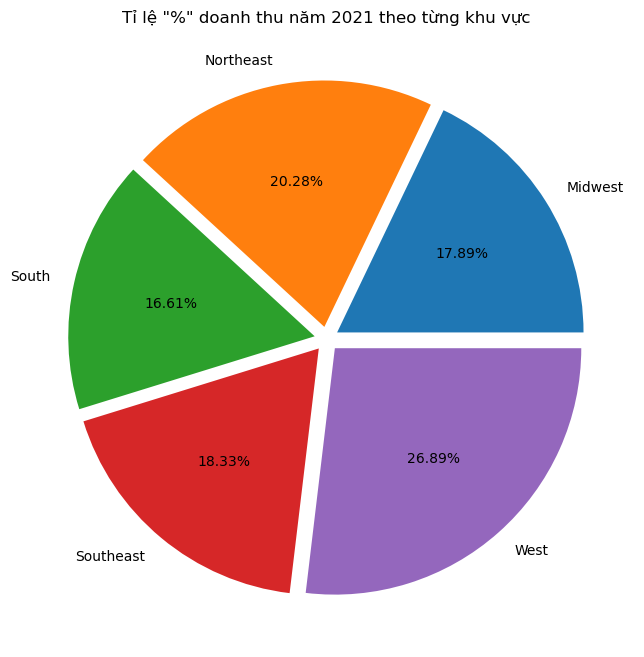

In [101]:
plt.figure(figsize=(8,8))
plt.pie(percentage_2021['percentages Sales'], labels=percentage_2021['Region'], autopct='%1.2f%%', explode=[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Tỉ lệ "%" doanh thu năm 2021 theo từng khu vực')
plt.show()

Next we will compare the revenue of each product in 2020 and 2021

In [102]:
sale_by_product_20 = dfn_2020.groupby(dfn_2020['Product']).sum()
sale_by_product_20 = sale_by_product_20.reset_index()
sale_by_product_20 = sale_by_product_20.sort_values('Total Sales')
sale_by_product_20

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\2831448348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_by_product_20 = dfn_2020.groupby(dfn_2020['Product']).sum()


,Product,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
4,Women's Athletic Footwear,250990877,10203,64177,23629892,8290748
0,Men's Apparel,251040108,11825,61227,26216964,9660079
5,Women's Street Footwear,250990877,10138,75791,27426005,9203865
1,Men's Athletic Footwear,250990877,10793,81760,31794462,9359264
3,Women's Apparel,254597304,12502,80208,35190332,11302907
2,Men's Street Footwear,254375774,10459,99186,37823020,15558847


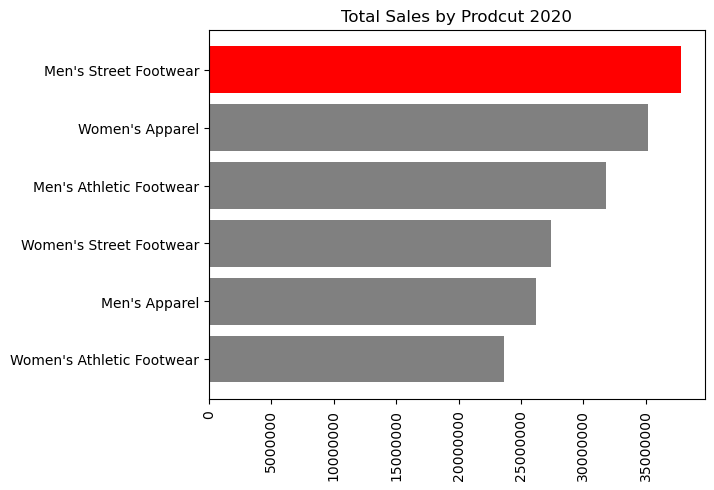

In [103]:
colors = ['r' if (bar == max(sale_by_product_20['Total Sales'])) else 'grey' for bar in sale_by_product_20['Total Sales']]
plt.barh(sale_by_product_20['Product'], sale_by_product_20['Total Sales'], color=colors)
plt.ticklabel_format(axis='x', style='plain')
plt.title('Total Sales by Prodcut 2020')
plt.xticks(rotation=90)
plt.show()

In [104]:
sale_by_product_21 = dfn_2021.groupby(dfn_2021['Product']).sum()
sale_by_product_21 = sale_by_product_21.reset_index()
sale_by_product_21 = sale_by_product_21.sort_values('Total Sales')
sale_by_product_21

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\3357836910.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_by_product_21 = dfn_2021.groupby(dfn_2021['Product']).sum()


,Product,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
4,Women's Athletic Footwear,1634055000,55824,253059,83002004,30685095
0,Men's Apparel,1634214365,68992,245456,97511668,35103020
5,Women's Street Footwear,1636553429,54588,316478,100576808,35892032
1,Men's Athletic Footwear,1638924893,59692,353766,121879218,42487700
3,Women's Apparel,1633028633,70472,353619,143848528,57348089
2,Men's Street Footwear,1635539996,60762,494134,171003224,67243476


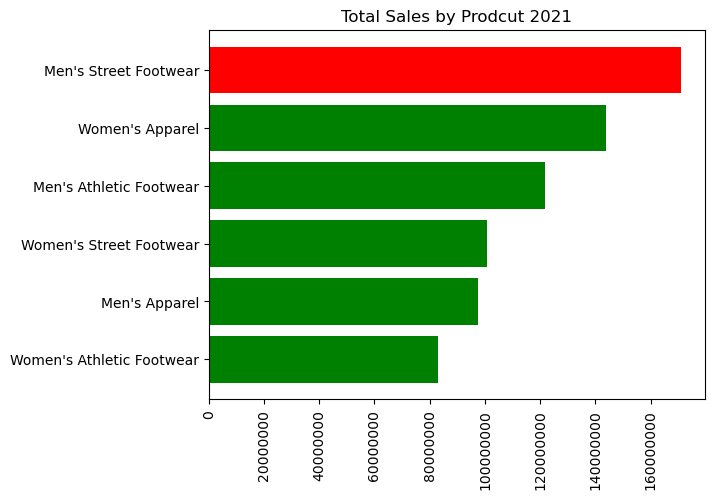

In [105]:
colors = ['r' if (bar == max(sale_by_product_21['Total Sales'])) else 'green' for bar in sale_by_product_21['Total Sales']]
plt.barh(sale_by_product_21['Product'], sale_by_product_21['Total Sales'], color=colors)
plt.ticklabel_format(axis='x', style='plain')
plt.title('Total Sales by Prodcut 2021')
plt.xticks(rotation=90)
plt.show()

Next we will compare the revenue of each method in 2020 and 2021

In [106]:
percentage_of_revenued_by_method = dfn_2020.groupby('Sales Method').sum()
percentage_of_revenued_by_method

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\1261013624.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  percentage_of_revenued_by_method = dfn_2020.groupby('Sales Method').sum()


,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
Sales Method,,,,,
In-store,330082010,17045,156575,93903000,31595571
Online,615484139,27432,87085,4519966,2116498
Outlet,567419668,21443,218689,83657709,29663641


In [107]:
percentage_of_revenued_by_method['percentages Methods']  = (percentage_of_revenued_by_method['Total Sales'] / sum(dfn_2020['Total Sales'])) * 100
percentage_of_revenued_by_method['percentages Methods'] = percentage_of_revenued_by_method['percentages Methods'].apply(lambda x: float('%.2f' %x))
percentage_of_revenued_by_method = percentage_of_revenued_by_method.reset_index()
percentage_of_revenued_by_method

,Sales Method,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,percentages Methods
0,In-store,330082010,17045,156575,93903000,31595571,51.57
1,Online,615484139,27432,87085,4519966,2116498,2.48
2,Outlet,567419668,21443,218689,83657709,29663641,45.95


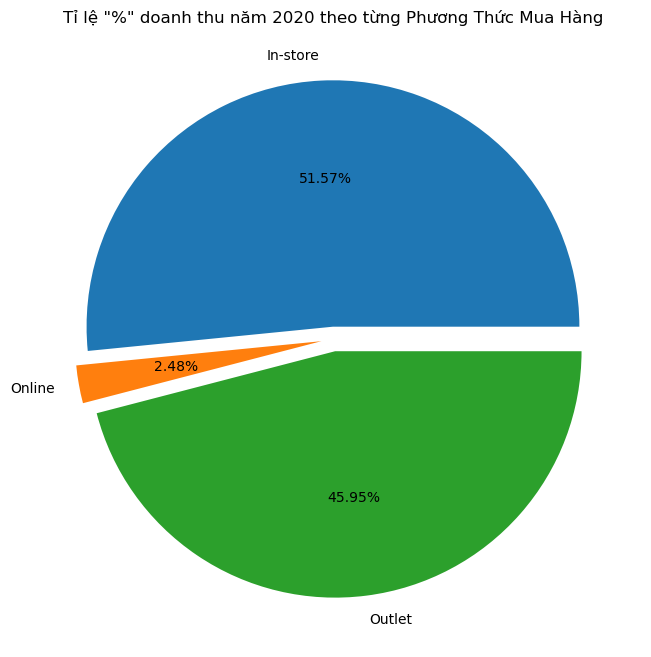

In [108]:
plt.figure(figsize=(8,8))
plt.pie(percentage_of_revenued_by_method['percentages Methods'], labels=percentage_of_revenued_by_method['Sales Method'], autopct='%1.2f%%', explode=[0.05, 0.05, 0.05])
plt.title('Tỉ lệ "%" doanh thu năm 2020 theo từng Phương Thức Mua Hàng')
plt.show()

In [109]:
percentage_of_revenued_by_method_21 = dfn_2021.groupby('Sales Method').sum()
percentage_of_revenued_by_method_21

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\1217620667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  percentage_of_revenued_by_method_21 = dfn_2021.groupby('Sales Method').sum()


,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
Sales Method,,,,,
In-store,1710577934,67895,533415,262740750,95995811
Online,5127876698,196989,852008,243152916,94438839
Outlet,2973861684,105446,631089,211927784,78324762


In [110]:
percentage_of_revenued_by_method_21['Percentages Methods']  = (percentage_of_revenued_by_method_21['Total Sales'] / sum(dfn_2021['Total Sales'])) * 100
percentage_of_revenued_by_method_21['Percentages Methods'] = percentage_of_revenued_by_method_21['Percentages Methods'].apply(lambda x: float('%.2f' %x))
percentage_of_revenued_by_method_21 = percentage_of_revenued_by_method_21.reset_index()
percentage_of_revenued_by_method_21

,Sales Method,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Percentages Methods
0,In-store,1710577934,67895,533415,262740750,95995811,36.60
1,Online,5127876698,196989,852008,243152916,94438839,33.87
2,Outlet,2973861684,105446,631089,211927784,78324762,29.52


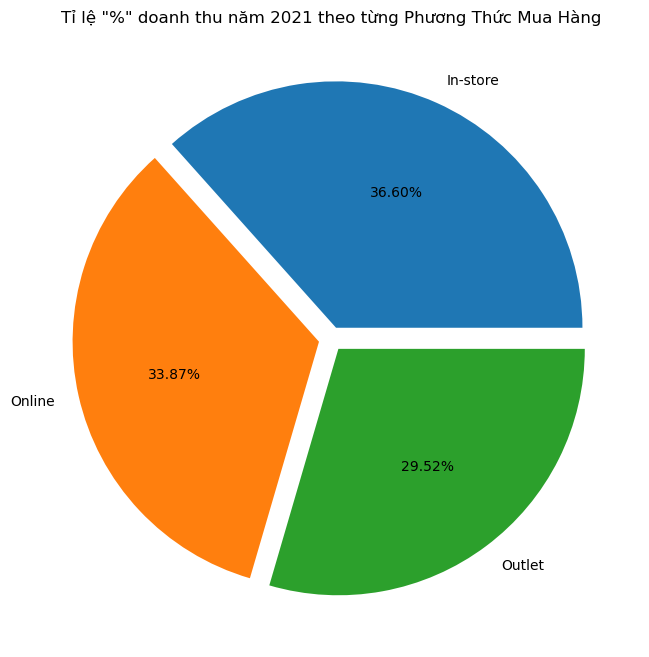

In [111]:
plt.figure(figsize=(8,8))
plt.pie(percentage_of_revenued_by_method_21['Percentages Methods'], labels=percentage_of_revenued_by_method_21['Sales Method'], autopct='%1.2f%%', explode=[0.05, 0.05, 0.05])
plt.title('Tỉ lệ "%" doanh thu năm 2021 theo từng Phương Thức Mua Hàng')
plt.show()

In this part, we will apply the machine learning model, in particular we will use the Linear Regression model to make predictions

In [112]:
dfn.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\4005644809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfn.corr()


,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379
Total Sales,-0.083580,0.435811,0.913431,1.000000,0.956307
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\888819177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfn.corr(), annot=True, cmap=plt.cm.Reds)


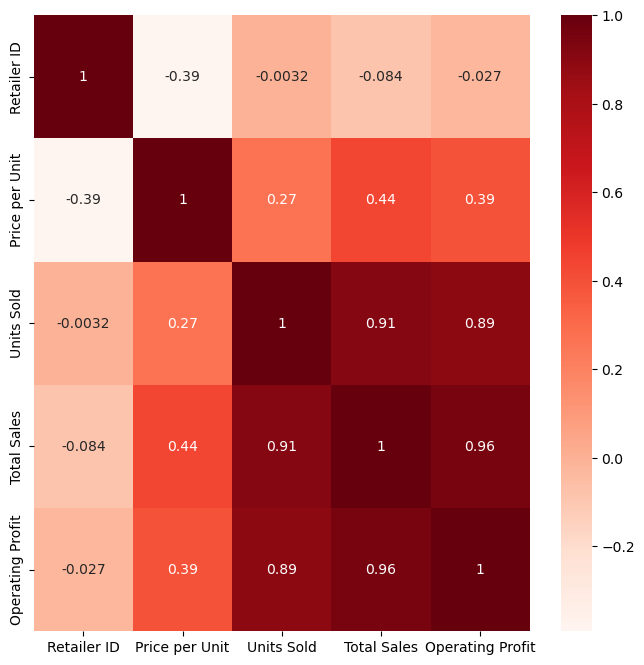

In [113]:
plt.figure(figsize=(8,8))
sns.heatmap(dfn.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [116]:
dfn.head()

,Retailer,Retailer ID,Invoice Date,Location Key,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Region,State,City
0,Foot Locker,1185732,2020-01-01,New York-New York,Men's Street Footwear,50,1200,600000,300000,50%,In-store,Northeast,New York,New York
1,Foot Locker,1185732,2020-01-02,New York-New York,Men's Athletic Footwear,50,1000,500000,150000,30%,In-store,Northeast,New York,New York
2,Foot Locker,1185732,2020-01-03,New York-New York,Women's Street Footwear,40,1000,400000,140000,35%,In-store,Northeast,New York,New York
3,Foot Locker,1185732,2020-01-04,New York-New York,Women's Athletic Footwear,45,850,382500,133875,35%,In-store,Northeast,New York,New York
4,Foot Locker,1185732,2020-01-05,New York-New York,Men's Apparel,60,900,540000,162000,30%,In-store,Northeast,New York,New York


In [117]:
Y = dfn['Price per Unit']
X = dfn[['Retailer', 'Product', 'Units Sold', 'Sales Method', 'Region']]

In [118]:
retailer_dict = {'Foot Locker': 0, 'Walmart': 1, 'Sports Direct': 2, 'West Gear': 3, "Kohl's": 4, 'Amazon': 5}
X['Retailer'] = X['Retailer'].map(retailer_dict)

X['Product'] = X['Product'].map({"Men's Street Footwear": 0, 
                    "Men's Athletic Footwear": 1, 
                    "Women's Street Footwear": 2, 
                    "Women's Athletic Footwear": 3,
                    "Men's Apparel": 4, 
                    "Women's Apparel": 5})

X['Sales Method'] = X['Sales Method'].map({'In-store': 0, 'Outlet': 1, 'Online': 2})

X['Region'] = X['Region'].map({'Northeast': 0, 'South': 1, 'West': 2, 'Midwest': 3, 'Southeast': 4})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\97333637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Retailer'] = X['Retailer'].map(retailer_dict)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\97333637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Product'] = X['Product'].map({"Men's Street Footwear": 0,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11820\97333637.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [119]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [120]:
X_train

,Retailer,Product,Units Sold,Sales Method,Region
8025,3,0,525,0,0
2573,2,3,131,1,1
6021,0,0,244,2,4
5725,2,4,450,2,4
112,0,4,231,2,0
...,...,...,...,...,...
2895,2,1,202,1,1
7813,3,4,46,2,3
905,0,3,225,1,3
5192,3,5,124,1,2


In [122]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [123]:
lm.score(X_train, Y_train)

0.14028889512891995

In [124]:
lm.coef_

array([ 0.44596244,  2.19641024,  0.02371487,  1.89800564, -0.01146035])

In [125]:
lm.intercept_

30.186809917372354

In [126]:
Y_pred = lm.predict(X)
Y_pred = pd.DataFrame(Y_pred, columns=['Price Predict'])
result_compare = pd.concat([X, Y, Y_pred], axis=1)
result_compare['Deviation'] = result_compare['Price Predict'] - result_compare['Price per Unit']

In [127]:
result_compare

,Retailer,Product,Units Sold,Sales Method,Region,Price per Unit,Price Predict,Deviation
0,0,0,1200,0,0,50,58.644648,8.644648
1,0,1,1000,0,0,50,56.098085,6.098085
2,0,2,1000,0,0,40,58.294496,18.294496
3,0,3,850,0,0,45,56.933676,11.933676
4,0,4,900,0,0,60,60.315830,0.315830
...,...,...,...,...,...,...,...,...
9643,0,4,64,1,0,50,42.388208,-7.611792
9644,0,5,105,1,0,41,45.556928,4.556928
9645,0,0,184,1,0,41,36.448351,-4.551649
9646,0,1,70,1,0,42,35.941266,-6.058734


In [128]:
x_new = [[2,2,1223,2,0]]
x_new = pd.DataFrame(x_new, columns=['Retailer', 'Product', 'Units Sold', 'Sales Method', 'Region'])
price = lm.predict(x_new)
price = pd.DataFrame(price, columns=['Price predict'])
df_n = pd.concat([x_new, price], axis=1)
df_n

,Retailer,Product,Units Sold,Sales Method,Region,Price predict
0,2,2,1223,2,0,68.270847


In [ ]:
# dfn.to_csv('out.csv', index=False)